### **[프로젝트 설명]**
기존 넷플릭스 영화 평점 데이터를 분석하여 새로운 컨텐츠 제작 아이디어 제안

### 1. 데이터 불러오기

- Kaggle 넷플릭스 영화 데이터셋, IMDb 평점 데이터 활용

In [1]:
import pandas as pd

netflix_df = pd.read_csv("./data/NetflixOriginals.csv", encoding = 'ISO-8859-1')

In [2]:
netflix_df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

### 2. 데이터 조회 및 전처리

In [3]:
netflix_df["Genre"].unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

In [4]:
netflix_df["Language"].unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

In [5]:
netflix_df["IMDB Score"].describe()

count    584.000000
mean       6.271747
std        0.979256
min        2.500000
25%        5.700000
50%        6.350000
75%        7.000000
max        9.000000
Name: IMDB Score, dtype: float64

In [6]:
upper50per_df = netflix_df[netflix_df["IMDB Score"]>= 6.4]

In [7]:
upper50per_df.sort_values(by=["IMDB Score"],
                        ascending = False
                       )

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
...,...,...,...,...,...,...
316,Two Catalonias,Documentary,"September 28, 2018",116,6.4,Spanish/Catalan
317,Walk. Ride. Rodeo.,Drama,"March 8, 2019",99,6.4,English
318,Wheelman,Action thriller,"October 20, 2017",82,6.4,English
319,When We First Met,Romantic comedy,"February 9, 2018",97,6.4,English


장르 대소문자, 대분류 소분류 정리하는 전처리

In [8]:
pd.set_option('display.max_rows', None) # 모든 행 표시
# pd.set_option('display.max_columns', None) # 모든 열 표시
# pd.set_option('display.expand_frame_repr', False) # 열이 화면 너비를 초과할 때 데이터프레임을 줄 바꿈하지 않도록 설정

In [9]:
import pandas as pd
import re

# 특수문자 없에기
netflix_df["Genre"] = netflix_df["Genre"].apply(lambda x: re.sub(r'[-/]', ' ', x).strip())

In [10]:
for i in range(len(netflix_df)):
    netflix_df.at[i, "Genre"] = re.sub(r'\bScience fiction\b', 'Sci-Fi', netflix_df.at[i, "Genre"], flags=re.IGNORECASE)

In [11]:
for i in range(len(netflix_df)):
    netflix_df.at[i, "Genre"] = re.sub(r'\bAnimation\b', 'Anime', netflix_df.at[i, "Genre"], flags=re.IGNORECASE)

In [12]:
# 두 칸 공백 한칸 공백으로 수정하기
for i in range(len(netflix_df)):
    netflix_df.at[i, "Genre"] = re.sub(r'\s+', ' ', netflix_df.at[i, "Genre"]).strip()

In [13]:
# 띄어쓰기 뒤에 나오는 알파벳을 소문자로 변환
for i in range(len(netflix_df)):
    genre = netflix_df.at[i, "Genre"]
    genre = re.sub(r'(\s+)(\w)', lambda m: m.group(1) + m.group(2).lower(),genre)
    netflix_df.at[i, "Genre"] = genre

In [14]:
# 동일한 카테고리 대소문자 정리
netflix_df["Genre"] = netflix_df["Genre"].str.replace(r'Variety Show', 'Variety show', regex=True)

In [15]:
# Dark comedy, Black comedy 합치기
netflix_df["Genre"] = netflix_df["Genre"].str.replace(r'Anthology/Dark comedy', 'Dark-comedy', regex=True)
netflix_df["Genre"] = netflix_df["Genre"].str.replace(r'Black comedy', 'Dark-comedy', regex=True)

In [16]:
# 오타, 비슷한 장르명 합치기
netflix_df["Genre"] = netflix_df["Genre"].str.replace('Christian musical', 'Christmas musical', regex=True)

In [17]:
# 전처리 1차 저장
netflix_df.to_csv("./data/Netflix_mission_processed_1.csv", index=False)

In [18]:
# 전처리 2차 시작
import pandas as pd

netflix_df2 = pd.read_csv("./data/Netflix_mission_processed_1.csv", encoding = 'ISO-8859-1')

In [19]:
netflix_df2.groupby("Genre").size()

Genre
Action                                  7
Action adventure                        1
Action comedy                           6
Action sci-Fi                           1
Action thriller                         4
Adventure                               2
Adventure comedy                        1
Adventure romance                       1
Aftershow interview                     6
Animated musical comedy                 1
Anime                                   5
Anime christmas comedy adventure        1
Anime comedy                            1
Anime comedy adventure                  1
Anime fantasy                           1
Anime musical adventure                 1
Anime musicial                          1
Anime sci-Fi                            3
Anime short                             5
Anime superhero                         1
Anthology dark comedy                   1
Biographical comedy                     1
Biopic                                  9
Christmas comedy            

오타, 비슷한 장르명 합치기

In [20]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Anime musicial', 'Anime musical', regex=True)

In [21]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Animated musical comedy', 'Anime comedy', regex=True)

In [22]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Anime christmas comedy adventure', 'Anime christmas', regex=True)

In [23]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Romance drama', 'Romantic drama', regex=True)

In [24]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Romantic teenage drama', 'Romantic teen drama', regex=True)

In [25]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Stop motion', 'Anime christmas', regex=True)

In [26]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Anime comedy adventure', 'Anime comedy', regex=True)

In [27]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Anime musical adventure', 'Anime musical', regex=True)

superhero 카테고리 없에기

In [28]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Superhero comedy', 'Action comedy', regex=True)

In [29]:
netflix_df2.loc[98, 'Genre'] = 'Action'

In [30]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Superhero', 'Action comedy', regex=True)

In [31]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Anime superhero', 'Documentary', regex=True)

In [32]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Superhero comedy', 'Action adventure', regex=True)

In [33]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Superhero action', 'Action adventure', regex=True)

christmas,Familly 카테고리 소분류 카테고리로 수정 -> 크리스마스 대분류로 이동

In [34]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Christmas fantasy adventure comedy', 'Christmas comedy', regex=True)

In [35]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Family christmas musical', 'Christmas musical', regex=True)

In [36]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Family film', 'Christmas comedy', regex=True)

In [37]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Comedy fantasy family', 'Fantasy', regex=True)

In [38]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Family', 'Comedy drama', regex=True)

In [39]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Comedy fantasy family', 'Fantasy', regex=True)

In [40]:
netflix_df2.loc[225, 'Genre'] = 'Adventure'

In [41]:
netflix_df2.loc[266, 'Genre'] = 'Adventure'

In [42]:
netflix_df2.loc[270, 'Genre'] = 'Adventure'

In [43]:
netflix_df2.loc[
    netflix_df2['Title'].str.contains('christ', case=False, na=False) & netflix_df2['Genre'].str.contains('Romantic', case=False, na=False),
    'Genre'
] = 'Christmas Romance'

In [44]:
netflix_df2['Premiere'] = pd.to_datetime(netflix_df2['Premiere'], errors='coerce')
netflix_df2.loc[
    netflix_df2['Premiere'].dt.month.isin([11, 12]) & netflix_df2['Genre'].str.contains('Romantic comedy', case=False, na=False),
    'Genre'
] = 'Christmas Romance'

In [45]:
netflix_df2.loc[
    netflix_df2['Title'].str.contains('christ', case=False, na=False) & netflix_df2['Genre'].str.contains('Anime', case=False, na=False),
    'Genre'
] = 'Anime christmas'

In [46]:
netflix_df2.loc[377, 'Genre'] = 'Christmas comedy'

In [47]:
netflix_df2.loc[226, 'Genre'] = 'Christmas Romance'

뮤지컬 카테고리 없애기

In [48]:
netflix_df2.loc[107, 'Genre'] = 'Christmas musical'

In [49]:
netflix_df2.loc[107, 'Genre'] = 'Christmas musical'

In [50]:
netflix_df2.loc[141, 'Genre'] = 'Drama musical'

In [51]:
netflix_df2.loc[204, 'Genre'] = 'Comedy musical'

In [52]:
netflix_df2.loc[108, 'Genre'] = 'Drama musical'

In [53]:
netflix_df2.loc[296, 'Genre'] = 'Comedy musical'

In [54]:
netflix_df2.loc[330, 'Genre'] = 'Comedy musical'

War 카테고리 액션으로 넣기

In [55]:
netflix_df2.loc[219, 'Genre'] = 'Action War'

In [56]:
netflix_df2.loc[
    netflix_df2['Genre'].str.contains('War', case=False, na=False),
    'Genre'
] = 'Action War'

western,histories 카테고리 없애기

In [57]:
netflix_df2.loc[
    netflix_df2['Genre'].str.contains('western', case=False, na=False),
    'Genre'
] = 'Action Western'

In [58]:
netflix_df2.loc[
    netflix_df2['Genre'].str.contains('histori', case=False, na=False),
    'Genre'
] = 'Action War'

fantasy 정리

In [59]:
netflix_df2.loc[267, 'Genre'] = 'Action Fantasy'

In [60]:
netflix_df2.loc[186, 'Genre'] = 'Christmas comedy'

In [61]:
netflix_df2.loc[94, 'Genre'] = 'Action Fantasy'

In [62]:
netflix_df2.loc[507, 'Genre'] = 'Action Fantasy'

In [63]:
netflix_df2.loc[104, 'Genre'] = 'Action Fantasy'

In [64]:
netflix_df2.groupby("Genre").size()

Genre
Action                            8
Action Fantasy                    4
Action War                        7
Action Western                    4
Action comedy                     9
Action comedy action              1
Action thriller                   4
Adventure                         5
Adventure comedy                  1
Adventure romance                 1
Aftershow interview               6
Anime                             3
Anime christmas                   4
Anime comedy                      3
Anime fantasy                     1
Anime musical                     2
Anime sci-Fi                      3
Anime short                       5
Anthology dark comedy             1
Biographical comedy               1
Biopic                            9
Christmas Romance                12
Christmas comedy                  5
Christmas musical                 3
Comedy                           48
Comedy drama                     15
Comedy horror                     2
Comedy musical        

Comedies

In [65]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Satire', 'Dark-comedy', regex=True)

In [66]:
netflix_df2["Genre"] = netflix_df2["Genre"].str.replace(r'Coming of age comedy drama', 'Comedy drama', regex=True)

In [67]:
netflix_df2.loc[386, 'Genre'] = 'Action comedy'

In [68]:
netflix_df2.loc[243, 'Genre'] = 'Comedy drama'

In [69]:
netflix_df2.loc[
    netflix_df2['Genre'].str.contains('Dark', case=False, na=False),
    'Genre'
] = 'Dark comedy'

In [70]:
netflix_df2.loc[netflix_df2['Genre'].str.contains('Heist', case=False, na=False), 'Genre'] = 'Crime thriller'

In [71]:
netflix_df2.loc[netflix_df2['Genre'].str.contains('Romantic comedy drama', case=False, na=False), 'Genre'] = 'Romantic comedy'

다큐멘터리 카테고리 정리

In [72]:
netflix_df2.loc[
    netflix_df2['Genre'].str.contains('After', case=False, na=False),
    'Genre'
] = 'bonus content'

In [73]:
netflix_df2.loc[
    netflix_df2['Genre'].str.contains('making of', case=False, na=False),
    'Genre'
] = 'bonus content'

In [74]:
netflix_df2.loc[457, 'Genre'] = 'Documentary reality'

In [75]:
rows_title = netflix_df2[netflix_df2['Title'].str.contains('christ', case=False, na=False) & netflix_df2['Genre'].str.contains('Anime', case=False, na=False)]

In [76]:
netflix_df2['Premiere'] = pd.to_datetime(netflix_df2['Premiere'], errors='coerce')

# 11월과 12월에 개봉된 영화 필터링
nov_dec_releases = netflix_df2[netflix_df2['Premiere'].dt.month.isin([11, 12])]


In [77]:
#전처리2차 저장
netflix_df2.to_csv("./data/Netflix_mission_processed_2.csv", index=False)

In [78]:
#전처리 2차 불러오기
import pandas as pd

netflix_df3 = pd.read_csv("./data/Netflix_mission_processed_2.csv", encoding = 'ISO-8859-1')

In [79]:
genre_mapping = {
    "Action": "Action & Adventure",
    "Action Fantasy": "Action & Adventure",
    "Action War": "Action & Adventure",
    "Action Western": "Action & Adventure",
    "Action comedy": "Action & Adventure",
    "Action thriller": "Action & Adventure",
    "Adventure": "Action & Adventure",
    "Adventure comedy": "Action & Adventure",
    "Adventure romance": "Action & Adventure",
    "Anime": "Anime",
    "Anime comedy": "Anime",
    "Anime fantasy": "Anime",
    "Anime musical": "Anime",
    "Anime sci-Fi": "Anime",
    "Christmas Romance": "Christmas",
    "Christmas comedy": "Christmas",
    "Christmas musical": "Christmas",
    "Anime christmas": "Christmas",
    "Comedy": "Comedies",
    "Comedy drama": "Comedies",
    "Comedy horror": "Comedies",
    "Comedy musical": "Comedies",
    "Comedy mystery": "Comedies",
    "Teen comedy drama": "Comedies",
    "Teen comedy horror": "Comedies",
    "Dark comedy": "Comedies",
    "Thriller": "Thrillers",
    "Spy thriller": "Thrillers",
    "Crime drama": "Thrillers",
    "Crime thriller": "Thrillers",
    "Political thriller": "Thrillers",
    "Psychological thriller": "Thrillers",
    "Psychological thriller drama": "Thrillers",
    "Horror": "Horror & Mystery",
    "Horror anthology": "Horror & Mystery",
    "Psychological horror": "Horror & Mystery",
    "Horror comedy": "Horror & Mystery",
    "Horror crime drama": "Horror & Mystery",
    "Horror thriller": "Horror & Mystery",
    "Mystery": "Horror & Mystery",
    "Documentary": "Documentary",
    "Mentalism special": "Documentary",
    "Aftershow interview": "Documentary",
    "Making of": "Documentary",
    "One man show": "Documentary",
    "Concert film": "Documentary",
    "Mockumentary": "Documentary",
    "bonus content": "Documentary",
    "documentary reality": "Documentary",
    "Drama": "Dramas",
    "Drama comedy": "Dramas",
    "Drama horror": "Dramas",
    "Drama musical": "Dramas",
    "Biographical comedy": "Dramas",
    "Biopic": "Dramas",
    "Sports drama": "Dramas",
    "Sports film": "Dramas",
    "Romance": "Romance",
    "Romantic comedy": "Romance",
    "Romantic drama": "Romance",
    "Romantic teen drama": "Romance",
    "Romantic thriller": "Romance",
    "Sci-Fi": "Sci-Fi",
    "Sci-Fi action": "Sci-Fi",
    "Sci-Fi adventure": "Sci-Fi",
    "Sci-Fi drama": "Sci-Fi",
    "Sci-Fi mystery": "Sci-Fi",
    "Sci-Fi thriller": "Sci-Fi",
    "Variety show": "TV show",
    "Hidden camera prank comedy": "TV show",
    "Anime short": "shorts",
    "Drama short": "shorts",
    "Musical short": "shorts"
}

In [80]:
netflix_df3['Main Genre'] = netflix_df['Genre'].map(genre_mapping)

In [81]:
netflix_df3['Genre'] = netflix_df3['Genre'].str.strip().str.lower()

# 매핑 사전도 동일하게 처리
cleaned_genre_mapping = {k.lower().strip(): v for k, v in genre_mapping.items()}

# 매핑 적용
netflix_df3['Main Genre'] = netflix_df3['Genre'].map(cleaned_genre_mapping)

In [82]:
netflix_df3.loc[netflix_df3['Runtime'] < 40, 'Main Genre'] = 'Shorts'

In [83]:
netflix_df3.loc[netflix_df3['Genre'].str.contains('anime christmas'), 'Main Genre'] = 'Anime'

In [84]:
netflix_df3.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [85]:
#전처리 대분류생성 완료 3차 저장
netflix_df3.to_csv("./data/Netflix_mission_processed_3.csv", index=False)

### 3. EDA

- **가설 1.** 영상 트렌드, 계절성 등 시장 특수성이 반영 된 영화가 평점이 높을 것이다.
- **가설 2.** 실존 유명인의 다큐멘터리, 백스테이지에서 벌어지는 실제 이야기를 궁금해하는 소비자가 많을 것이다.

In [97]:
# 실존 유명인의 다큐멘터리, 백스테이지에서의 이야기를 궁금해하는 소비자가 많을 것이다.
# 드라마, 로맨스 등 시청자의 삶에 투영할 수 있는 공감가는 이야기에 평점이 높을 것이다.
# 친근한 것과 새로운 것의 경계

In [86]:
#전처리 3차 불러오기
import pandas as pd

netflix_df3 = pd.read_csv("./data/Netflix_mission_processed_3.csv", encoding = 'ISO-8859-1')

In [87]:
# 장르 별 평점 분포

In [88]:
import seaborn as sns
from matplotlib import pyplot as plt

In [89]:
sns.set_style("whitegrid")

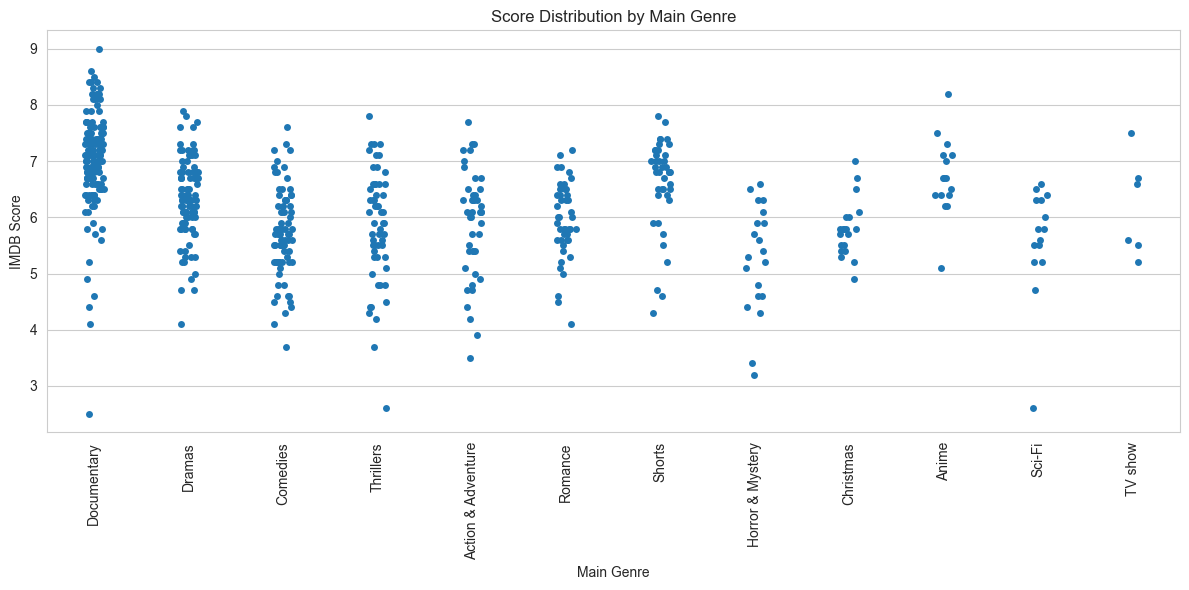

In [90]:
order = netflix_df3['Main Genre'].value_counts().index
plt.figure(figsize=(12, 6))  # 그래프 크기 조정

sns.stripplot(
    
    x="Main Genre",
    y="IMDB Score",
    data=netflix_df3,
    size=5,
    order=order
)
plt.xticks(rotation=90)  # x축 카테고리 레이블 회전
plt.title('Score Distribution by Main Genre')
plt.xlabel('Main Genre')
plt.ylabel('IMDB Score')
plt.tight_layout() 
plt.show()

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_69181/4133604756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


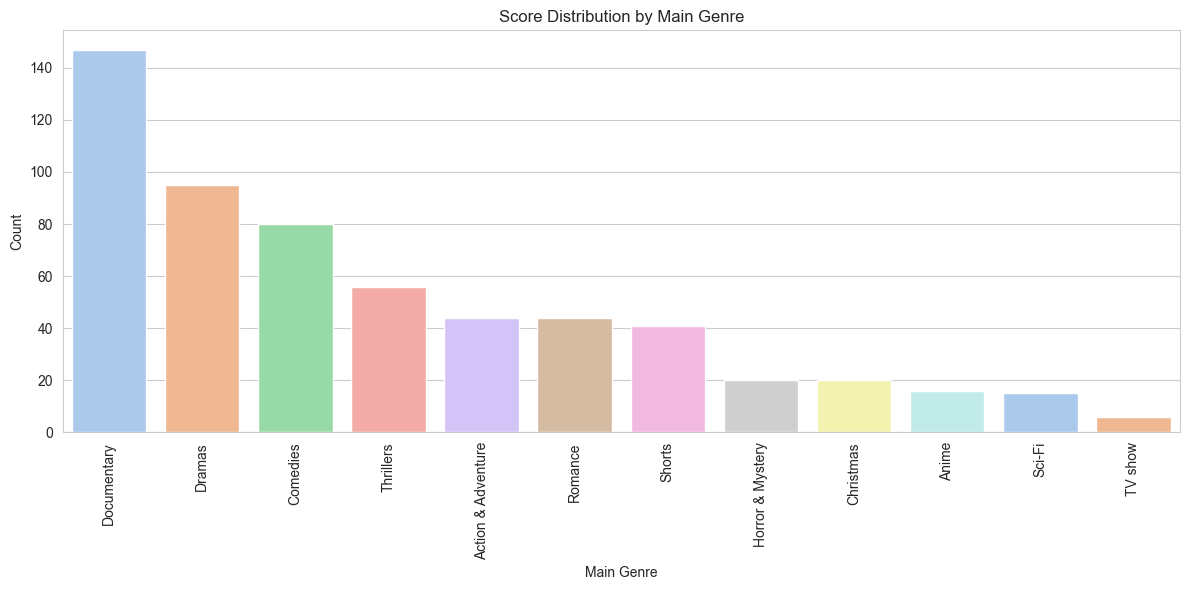

In [91]:
order = netflix_df3['Main Genre'].value_counts().index
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
sns.countplot(
    x="Main Genre",
    palette="pastel",
    data=netflix_df3,
    order=order
)
plt.xticks(rotation=90)  # x축 카테고리 레이블 회전
plt.title('Score Distribution by Main Genre')
plt.xlabel('Main Genre')
plt.ylabel('Count')
plt.tight_layout() 
plt.show()

전체 평점점수 평균 6.2점, box권 50% 6.35점으로 6점이상 작품으로 표를 다시 그려보았다. 

In [93]:
upper_df = netflix_df3[netflix_df3["IMDB Score"]>= 6]

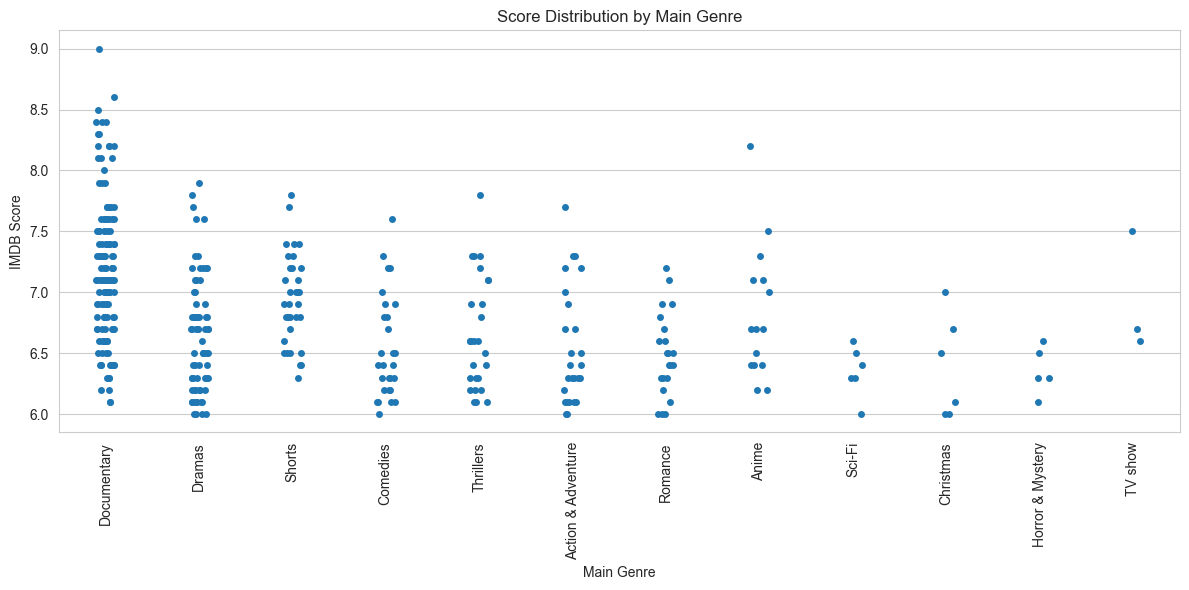

In [94]:
order = upper_df['Main Genre'].value_counts().index
plt.figure(figsize=(12, 6))  # 그래프 크기 조정

sns.stripplot(
    
    x="Main Genre",
    y="IMDB Score",
    data=upper_df,
    size=5,
    order=order
)
plt.xticks(rotation=90)  # x축 카테고리 레이블 회전
plt.title('Score Distribution by Main Genre')
plt.xlabel('Main Genre')
plt.ylabel('IMDB Score')
plt.tight_layout() 
plt.show()

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_69181/3782440691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


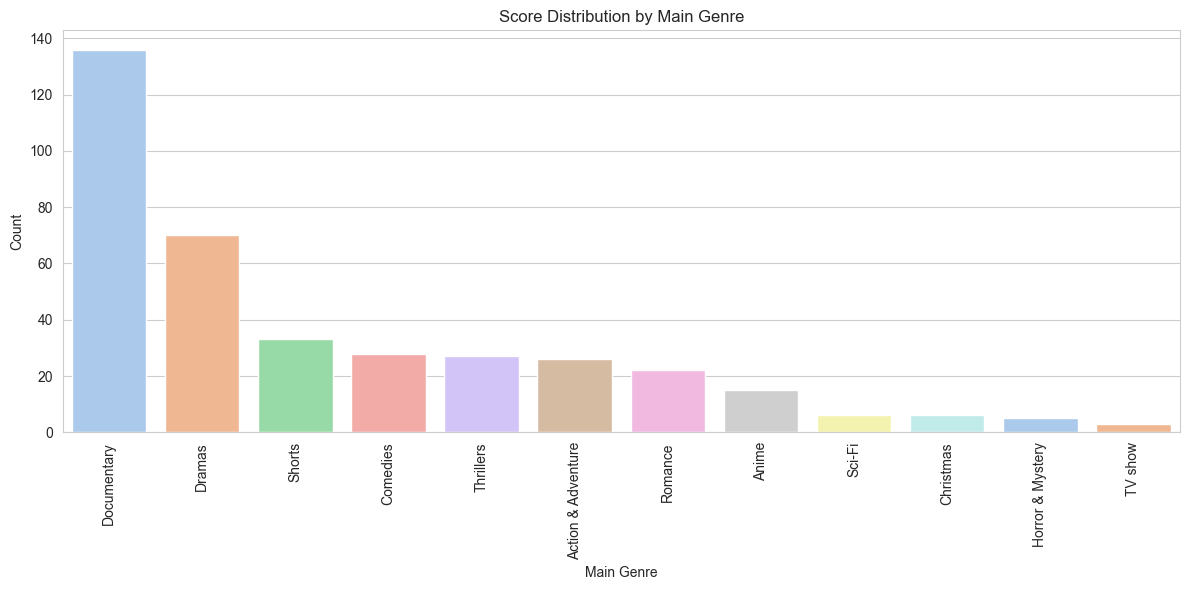

In [95]:
order = upper_df['Main Genre'].value_counts().index
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
sns.countplot(
    x="Main Genre",
    palette="pastel",
    data=upper_df,
    order=order
)
plt.xticks(rotation=90)  # x축 카테고리 레이블 회전
plt.title('Score Distribution by Main Genre')
plt.xlabel('Main Genre')
plt.ylabel('Count')
plt.tight_layout() 
plt.show()

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_69181/428830832.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Main Genre', y='Ratio_Above_6', data=ratio_df_sorted, palette="viridis")


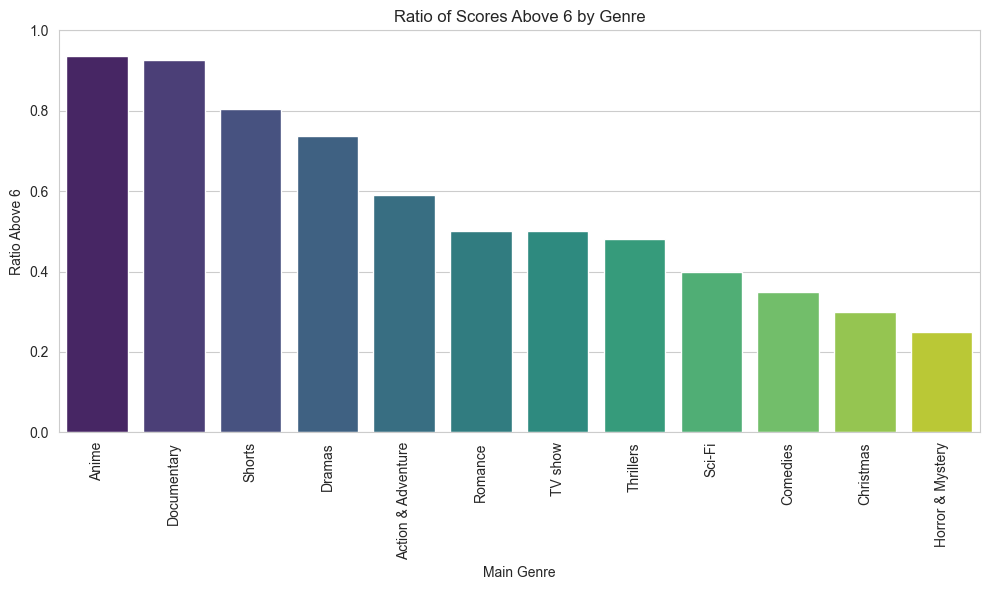

In [96]:
# 6점 이상과 이하의 비율 계산
netflix_df3['Above_6'] = netflix_df3['IMDB Score'] >= 6
ratio_df = netflix_df3.groupby('Main Genre')['Above_6'].mean().reset_index()
ratio_df.columns = ['Main Genre', 'Ratio_Above_6']
ratio_df_sorted = ratio_df.sort_values(by='Ratio_Above_6', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(x='Main Genre', y='Ratio_Above_6', data=ratio_df_sorted, palette="viridis")
plt.title('Ratio of Scores Above 6 by Genre')
plt.xlabel('Main Genre')
plt.ylabel('Ratio Above 6')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [98]:
# 40분이하의 영화를 Shorts film으로 불리는데, 해당하는 영화들이 주로 평점이 높았다.(짧은 다큐멘터리, 영화 제작, 인플루언서 관련 된 비하인드, 에프터 씬을 보너스컨텐츠로 분류했다. )

In [99]:
# Anime 의 경우 특정매니아층, 어린이, 키즈 관람객을 위한 컨텐츠

In [100]:
rows = netflix_df3[netflix_df3['Main Genre'].str.contains('Shorts', case=False, na=False)]

### 4.T-test 검증

#### documentary

In [103]:
import pandas as pd
import scipy.stats as stats


# 특정 장르(A)와 다른 장르의 데이터 분리
genre_a_scores = netflix_df3[netflix_df3['Main Genre'] == 'Documentary']['IMDB Score']
other_genres_scores = netflix_df3[netflix_df3['Main Genre'] != 'Documentary']['IMDB Score']

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(genre_a_scores, other_genres_scores, equal_var=False)

# 결과 출력
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# P-value 해석
if p_value < 0.05:
    print("유의미한 차이가 있음")
else:
    print("유의미한 차이가 없음")


T-statistic: 12.199732886657273, P-value: 2.478353720704024e-27
유의미한 차이가 있음


#### anime

In [104]:
# 특정 장르(A)와 다른 장르의 데이터 분리
genre_a_scores = netflix_df3[netflix_df3['Main Genre'] == 'Anime']['IMDB Score']
other_genres_scores = netflix_df3[netflix_df3['Main Genre'] != 'Anime']['IMDB Score']

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(genre_a_scores, other_genres_scores, equal_var=False)

# 결과 출력
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# P-value 해석
if p_value < 0.05:
    print("유의미한 차이가 있음")
else:
    print("유의미한 차이가 없음")


T-statistic: 2.6114986480542965, P-value: 0.018367244638247637
유의미한 차이가 있음


#### shorts

In [106]:
# 특정 장르(A)와 다른 장르의 데이터 분리
genre_a_scores = netflix_df3[netflix_df3['Main Genre'] == 'Shorts']['IMDB Score']
other_genres_scores = netflix_df3[netflix_df3['Main Genre'] != 'Shorts']['IMDB Score']

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(genre_a_scores, other_genres_scores, equal_var=False)

# 결과 출력
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# P-value 해석
if p_value < 0.05:
    print("유의미한 차이가 있음")
else:
    print("유의미한 차이가 없음")


T-statistic: 2.7217675333539284, P-value: 0.008945112331755293
유의미한 차이가 있음
